This file is not that important. Just testing some stuff, so I can visualize decision trees and random forests better

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the Breast Cancer Dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Arrange Data into Features Matrix and Target Vector
X = df.loc[:, df.columns != 'target']
y = df.loc[:, 'target'].values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)

# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [10]:
from xgboost import XGBClassifier

rf = XGBClassifier(n_estimators=20, max_depth=10, learning_rate=0.1, subsample=0.8, colsample_bytree=0.7)

rf.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

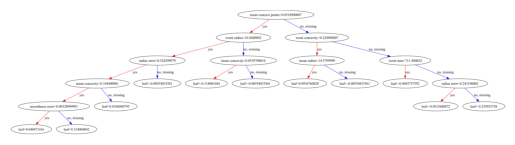

In [11]:
from xgboost import plot_tree

# Visualize the first tree (index=0)
plot_tree(rf, num_trees=0)
plt.show()

In [8]:
!pip3 install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.5 MB/s eta 0:00:00


In [6]:
from xgboost import XGBRegressor, plot_tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

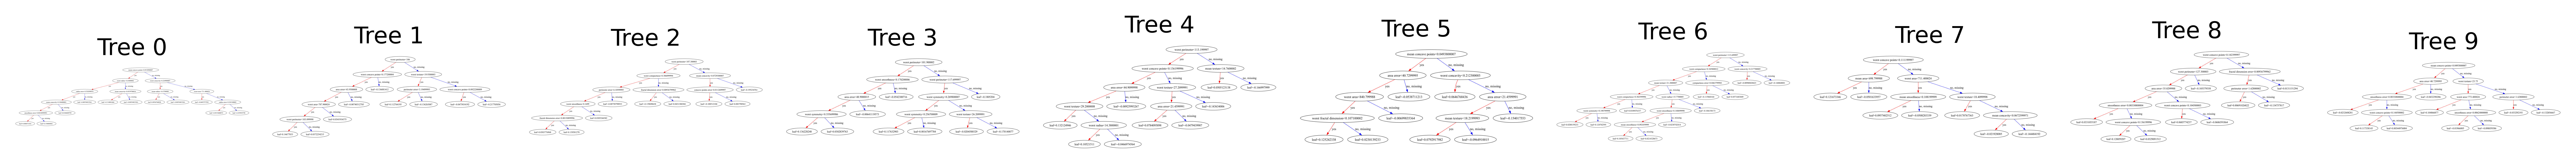

In [5]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Feature and class names
fn = data.feature_names  # Feature names
cn = data.target_names   # Class names

# Set grid size (adjust rows & cols as needed)
nrows, ncols = 7, 14
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16*1.5, 9*1.5), dpi=900)
axes = axes.flatten()  # Flatten to 1D array

# Number of trees to plot (ensure it does not exceed available trees)
num_estimators = min((nrows * ncols) - 3, rf.n_estimators)

# Plot each tree in a subplot
for index in range(num_estimators):
    plot_tree(rf, num_trees=index, ax=axes[index])
    axes[index].set_title(f'Tree {index}', fontsize=11)

# Hide any unused subplots
for i in range(num_estimators, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and save figure
fig.tight_layout()
fig.savefig('./images/xgboost/xgb_trees.png', dpi=900)
plt.show()


In [12]:
import os
import matplotlib.pyplot as plt
from xgboost import plot_tree

# Feature and class names
fn = data.feature_names  # Feature names
cn = data.target_names   # Class names (not directly used in XGBoost trees)

# Output directory
output_dir = "./images/xgboost/"
os.makedirs(output_dir, exist_ok=True)  # Ensure the directory exists

num_estimators = min(19, rf.n_estimators)  # Adjust based on model

# Loop over estimators and save each tree
for index in range(num_estimators):
    fig, ax = plt.subplots(figsize=(10, 3), dpi=300)  # New figure for each tree

    plot_tree(rf, num_trees=index, ax=ax)  # Plot individual tree
    ax.set_title(f'Tree {index}', fontsize=14)

    fig.tight_layout()
    fig.savefig(f'{output_dir}xgb_tree_{index}.png')  # Save each tree separately
    plt.close(fig)  # Close to free memory

print(f"Saved {num_estimators} XGBoost trees to {output_dir}")


Saved 19 XGBoost trees to ./images/xgboost/


/opt/homebrew/anaconda3/envs/neuralNets/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


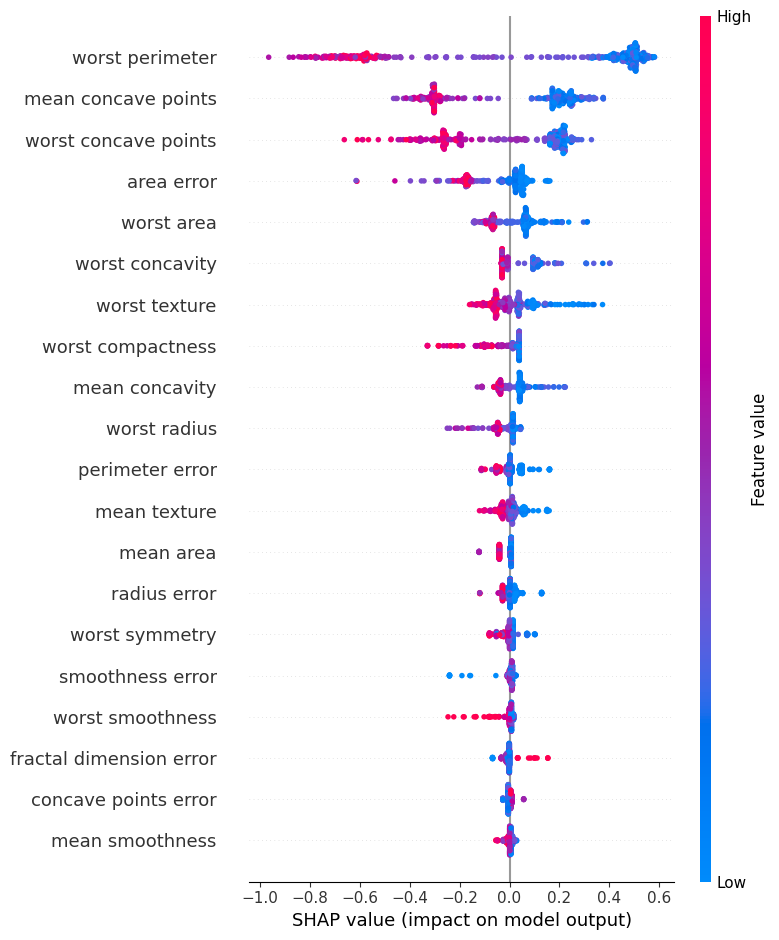

In [8]:
import shap

explainer = shap.Explainer(rf)
shap_values = explainer(X_train)

# Summary plot of feature importance
shap.summary_plot(shap_values, X_train)


In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = data.feature_names
cn = data.target_names

output_dir = "./images/decision_trees/"

num_estimators = 6

for index in range(num_estimators):
    fig, ax = plt.subplots(figsize=(5, 5), dpi=300)  # Create a new figure for each tree

    plot_tree(rf.estimators_[index],
              feature_names=fn,
              class_names=cn,
              filled=True,
              ax=ax)

    ax.set_title(f'Estimator: {index}', fontsize=14)

    fig.tight_layout()
    fig.savefig(f'{output_dir}rf_tree_{index}.png')  # Save each tree separately
    plt.close(fig)  # Close the figure to free memory
